In [1]:
from pathlib import Path

import joblib
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics.cluster as metrics

from torch.utils.data import DataLoader

from hypernevus.datasets import image_loader, prepare_dataset

In [2]:
output_dir = Path("../output/2020-11-10-1653/")
assert output_dir.exists()
assert len(list(output_dir.iterdir())) == 10

In [3]:
def prepare_dataloader(data_dir):
    dataset = prepare_dataset(data_dir, bands=slice(0, 115))
    dataloader = DataLoader(dataset, shuffle=True, batch_size=256, num_workers=1)

    return dataloader

In [4]:
data_dir = Path("../data/patches/32/")
assert data_dir.exists()

In [5]:
bands = slice(0, 115)
load_image = image_loader(bands)

def load_image_patches(prefix):
    patches = []
    labels = []
    
    for patch_file in sorted(list(data_dir.rglob(f"{prefix}*.npy"))):
        patches.append(load_image(str(patch_file)))
        labels.append(patch_file.stem.endswith("--roi"))
        
    return patches, labels

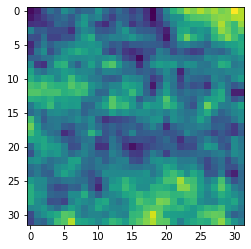

In [14]:
patches, labels = load_image_patches("0aba91a")

patches = np.stack(patches).astype(np.double)

plt.imshow(patches[0][..., 50])

In [10]:
run_dirs = sorted(list(output_dir.glob("run*/")))
run_dirs

[PosixPath('../output/2020-11-10-1653/run-01'),
 PosixPath('../output/2020-11-10-1653/run-02'),
 PosixPath('../output/2020-11-10-1653/run-03'),
 PosixPath('../output/2020-11-10-1653/run-04'),
 PosixPath('../output/2020-11-10-1653/run-05'),
 PosixPath('../output/2020-11-10-1653/run-06'),
 PosixPath('../output/2020-11-10-1653/run-07'),
 PosixPath('../output/2020-11-10-1653/run-08'),
 PosixPath('../output/2020-11-10-1653/run-09'),
 PosixPath('../output/2020-11-10-1653/run-10')]

In [45]:
from itertools import combinations, permutations
from sklearn.metrics import accuracy_score

all_labels = []

for run_dir in run_dirs:
    print(run_dir.stem)
    km = joblib.load(run_dir / "kmeans.joblib")
    labels = km.predict(patches.reshape((-1, 115 * 32 * 32)))
    
    if len(all_labels) > 0:
        prev = all_labels[-1]
        
        for i in range(2):
            for j in range(2):
                print(np.sum(np.equal(labels == i, prev == j)))
        
        
    all_labels.append(labels)

run-01
run-02
1018
6
6
1018
run-03
1018
6
6
1018
run-04
1005
19
19
1005
run-05
19
1005
1005
19
run-06
37
987
987
37
run-07
66
958
958
66
run-08
1013
11
11
1013
run-09
15
1009
1009
15
run-10
36
988
988
36
